# Zadanie 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout,LSTM, GRU
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

In [ ]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
history = model.fit(X_train_scaled[:,:,np.newaxis], y_train, epochs=100, batch_size=32, validation_split=0.2)

4/4 [==============================] - 0s 4ms/step


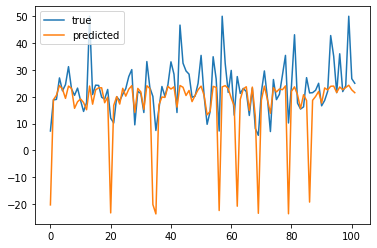

In [ ]:
y_pred = model.predict(X_test_scaled[:,:,np.newaxis])
plt.plot(y_test, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()

# Zadanie 1 - LSTM

In [ ]:
from keras.layers import LSTM, Embedding

# set hyperparameters
max_features = 10000  # maximum number of words
maxlen = 13  # maximum sequence length
batch_size = 16
embedding_dims = 50  # dimensionality of word embeddings
hidden_dims = 32  # number of neurons in the hidden layer

model = Sequential()
# model.add(SimpleRNN(units=32, input_shape=(X_train.shape[1], 1)))
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(LSTM(hidden_dims))
model.add(Dense(units=1))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 13, 50)            500000    
                                                                 
 lstm_7 (LSTM)               (None, 32)                10624     
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 510,657
Trainable params: 510,657
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(lr=0.01), loss='mse') # mea VS mse VS mean_squarred_error
history = model.fit(X_train_scaled, y_train, batch_size=batch_size, epochs=200, validation_data=(X_test_scaled, y_test))

Epoch 1/200


/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


26/26 [==============================] - 2s 21ms/step - loss: 308.0443 - val_loss: 162.8669
Epoch 2/200
26/26 [==============================] - 0s 6ms/step - loss: 111.4138 - val_loss: 90.0929
Epoch 3/200
26/26 [==============================] - 0s 6ms/step - loss: 85.4342 - val_loss: 83.4868
Epoch 4/200
26/26 [==============================] - 0s 6ms/step - loss: 84.8963 - val_loss: 83.6133
Epoch 5/200
26/26 [==============================] - 0s 6ms/step - loss: 84.9877 - val_loss: 83.6433
Epoch 6/200
26/26 [==============================] - 0s 6ms/step - loss: 85.2278 - val_loss: 83.5113
Epoch 7/200
26/26 [==============================] - 0s 6ms/step - loss: 84.8076 - val_loss: 83.8999
Epoch 8/200
26/26 [==============================] - 0s 6ms/step - loss: 84.7348 - val_loss: 83.5867
Epoch 9/200
26/26 [==============================] - 0s 6ms/step - loss: 85.1578 - val_loss: 83.5787
Epoch 10/200
26/26 [==============================] - 0s 6ms/step - loss: 84.7977 - val_loss: 83.69

4/4 [==============================] - 0s 4ms/step - loss: 33.5577
loss=33.557716369628906
4/4 [==============================] - 0s 3ms/step


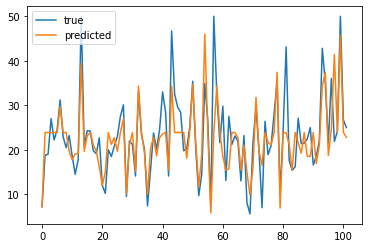

In [ ]:
loss = model.evaluate(X_test_scaled, y_test)
print(f"{loss=}")
y_pred = model.predict(X_test_scaled[:,:,np.newaxis])
plt.plot(y_test, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()

# Zadanie 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout,LSTM, GRU, Embedding
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

In [ ]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(SimpleRNN(units=32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.summary()

## TO DO: Wybierz optymalizator(zastanów sie nad parametrami jakie można mu przypisać oraz dobierz funkcje straty!)
model.compile(optimizer='adam' , loss='mse')

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 13, 64)            4224      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 7,361
Trainable params: 7,361
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train_scaled[:,:,np.newaxis], y_train, epochs=200, batch_size=16, validation_split=0.2)

Epoch 1/200
21/21 [==============================] - 3s 38ms/step - loss: 535.6745 - val_loss: 551.9785
Epoch 2/200
21/21 [==============================] - 1s 27ms/step - loss: 426.3938 - val_loss: 421.5092
Epoch 3/200
21/21 [==============================] - 1s 26ms/step - loss: 337.3343 - val_loss: 362.5236
Epoch 4/200
21/21 [==============================] - 1s 27ms/step - loss: 301.0489 - val_loss: 331.9878
Epoch 5/200
21/21 [==============================] - 1s 25ms/step - loss: 271.5805 - val_loss: 305.8804
Epoch 6/200
21/21 [==============================] - 1s 26ms/step - loss: 252.7083 - val_loss: 284.5908
Epoch 7/200
21/21 [==============================] - 1s 25ms/step - loss: 235.3360 - val_loss: 265.2001
Epoch 8/200
21/21 [==============================] - 1s 25ms/step - loss: 218.5527 - val_loss: 248.5552
Epoch 9/200
21/21 [==============================] - 1s 26ms/step - loss: 205.3248 - val_loss: 233.2234
Epoch 10/200
21/21 [==============================] - 1s 27ms/st

4/4 [==============================] - 0s 6ms/step


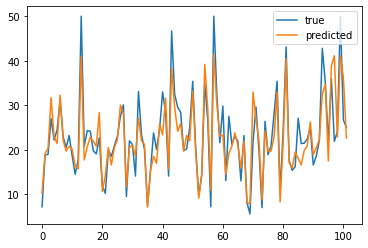

In [ ]:
y_pred = model.predict(X_test_scaled[:,:,np.newaxis])
plt.plot(y_test, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()

# Zadanie 2 - LSTM

In [ ]:
model = Sequential()
# model.add(SimpleRNN(units=64, input_shape=(X_train.shape[1], 1), return_sequences=True))
# model.add(SimpleRNN(units=32, return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(units=1))
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(LSTM(hidden_dims))
model.add(Dense(units=1))
model.summary()

## TO DO: Wybierz optymalizator(zastanów sie nad parametrami jakie można mu przypisać oraz dobierz funkcje straty!)
model.compile(optimizer='adam' , loss='mse')
history = model.fit(X_train_scaled, y_train, batch_size=batch_size, epochs=200, validation_data=(X_test_scaled, y_test))

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 13, 50)            500000    
                                                                 
 lstm_9 (LSTM)               (None, 32)                10624     
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 510,657
Trainable params: 510,657
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
26/26 [==============================] - 4s 38ms/step - loss: 156.9908 - val_loss: 91.0891
Epoch 2/200
26/26 [==============================] - 0s 9ms/step - loss: 87.1478 - val_loss: 83.7927
Epoch 3/200
26/26 [==============================] - 0s 6ms/step - loss: 85.9873 - val_loss: 86.8229
Epoch 

4/4 [==============================] - 0s 4ms/step


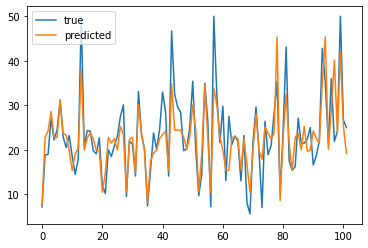

In [ ]:
y_pred = model.predict(X_test_scaled[:,:,np.newaxis])
plt.plot(y_test, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()

# Zadanie 3

In [ ]:
from tensorflow.keras.layers import Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(units=64, input_shape=(X_train.shape[1], 1), return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=32, return_sequences=False)))
model.add(Dense(units=1))
model.compile(optimizer=Adam(lr=0.003), loss='mse')

In [ ]:
history = model.fit(X_train_scaled[:,:,np.newaxis], y_train, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
21/21 [==============================] - 7s 70ms/step - loss: 372.4630 - val_loss: 205.5523
Epoch 2/100
21/21 [==============================] - 0s 10ms/step - loss: 138.2480 - val_loss: 131.9745
Epoch 3/100
21/21 [==============================] - 0s 11ms/step - loss: 99.2057 - val_loss: 100.4683
Epoch 4/100
21/21 [==============================] - 0s 10ms/step - loss: 86.5341 - val_loss: 90.6195
Epoch 5/100
21/21 [==============================] - 0s 11ms/step - loss: 84.6531 - val_loss: 87.5195
Epoch 6/100
21/21 [==============================] - 0s 10ms/step - loss: 84.1964 - val_loss: 87.1542
Epoch 7/100
21/21 [==============================] - 0s 10ms/step - loss: 84.2106 - val_loss: 87.0787
Epoch 8/100
21/21 [==============================] - 0s 10ms/step - loss: 84.1746 - val_loss: 87.0060
Epoch 9/100
21/21 [==============================] - 0s 10ms/step - loss: 84.2179 - val_loss: 86.9324
Epoch 10/100
21/21 [==============================] - 0s 9ms/step - loss: 84.

4/4 [==============================] - 0s 4ms/step


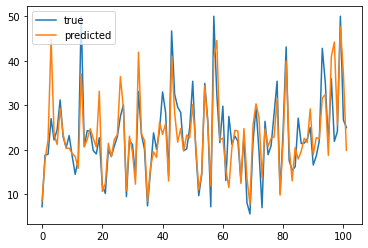

In [ ]:
y_pred = model.predict(X_test_scaled[:,:,np.newaxis])
plt.plot(y_test, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()

# Zadanie 4

In [ ]:
import tensorflow as tf
import numpy as np
import os
import time

path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

# Wczytanie danych tekstowych
with open(path_to_file, 'r') as f:
    text = f.read().lower()
print('Długość tekstu:', len(text))

# Tworzenie słownika znaków
chars = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# Przygotowanie sekwencji danych wejściowych i wyjściowych
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i:i + maxlen])
    next_chars.append(text[i + maxlen])
print('Liczba sekwencji:', len(sentences))

# Przygotowanie danych wejściowych i wyjściowych
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

# Definicja modelu sieci rekurencyjnej
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(256, input_shape=(maxlen, len(chars)), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(chars), activation='softmax')
])

# Kompilacja modelu
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

# Nauczanie modelu
model.fit(x, y, batch_size=64, epochs=20)

# Generowanie tekstu
start_index = np.random.randint(0, len(text) - maxlen - 1)
generated_text = text[start_index:start_index + maxlen]
print('--- Początek generowanego tekstu: "' + generated_text + '"')

for i in range(400):
    x_pred = np.zeros((1, maxlen, len(chars)))
    for t, char in enumerate(generated_text):
        x_pred[0, t, char_indices[char]] = 1
    preds = model.predict(x_pred, verbose=0)[0]
    next_index = np.random.choice(len(preds), p=preds)
    next_char = indices_char[next_index]
    generated_text += next_char
    generated_text = generated_text[1:]

print('--- Wygenerowany tekst: "' + generated_text + '"')

# Zadanie 5

In [ ]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# set hyperparameters
max_features = 10000  # maximum number of words
maxlen = 100  # maximum sequence length
batch_size = 32
embedding_dims = 50  # dimensionality of word embeddings
hidden_dims = 32  # number of neurons in the hidden layer

# load IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# adjust sequence lengths
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Definicja modelu sieci rekurencyjnej
# model = tf.keras.models.Sequential([
#     tf.keras.layers.LSTM(256, input_shape=(maxlen, len(chars)), return_sequences=True),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.LSTM(128),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(len(chars), activation='softmax')
# ])
model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(LSTM(hidden_dims, return_sequences=True))
model.add(LSTM(hidden_dims))
model.add(Dense(1, activation='sigmoid'))

# Kompilacja modelu
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Nauczanie modelu
# model.fit(x, y, batch_size=64, epochs=20)
model.fit(x_train, y_train, batch_size=batch_size, epochs=20, validation_data=(x_test, y_test))

# Przygotowanie słownika mapowania identyfikatorów słów na słowa
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Wybór losowej sekwencji tekstowej z testowego zestawu danych
sample = np.random.randint(len(x_test))
text = x_test[sample]
label = y_test[sample]

# Wartości w zakresie 0-2 są zarezerwowane dla specjalnych znaków, zacznijmy od indeksu 3
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in text])
print(f"Tekst: {decoded_review}")
print(f"Etykieta:{label}")

# Dokonanie predykcji na przykładowych danych
prediction = model.predict(np.array([text]))
print(f"Predykcja: {prediction[0]}")

Epoch 1/20
782/782 [==============================] - 37s 42ms/step - loss: 0.4084 - accuracy: 0.8096 - val_loss: 0.3545 - val_accuracy: 0.8462
Epoch 2/20
782/782 [==============================] - 15s 19ms/step - loss: 0.2606 - accuracy: 0.8963 - val_loss: 0.3456 - val_accuracy: 0.8490
Epoch 3/20
782/782 [==============================] - 13s 16ms/step - loss: 0.1918 - accuracy: 0.9272 - val_loss: 0.4026 - val_accuracy: 0.8376
Epoch 4/20
782/782 [==============================] - 13s 16ms/step - loss: 0.1349 - accuracy: 0.9506 - val_loss: 0.4754 - val_accuracy: 0.8304
Epoch 5/20
782/782 [==============================] - 14s 18ms/step - loss: 0.1006 - accuracy: 0.9659 - val_loss: 0.4876 - val_accuracy: 0.8286
Epoch 6/20
782/782 [==============================] - 13s 17ms/step - loss: 0.0751 - accuracy: 0.9757 - val_loss: 0.5916 - val_accuracy: 0.8291
Epoch 7/20
782/782 [==============================] - 14s 18ms/step - loss: 0.0584 - accuracy: 0.9817 - val_loss: 0.6297 - val_accuracy:

# Zadanie 7

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout,LSTM, GRU
from keras.optimizers import Adam, RMSprop, Adagrad
from sklearn.preprocessing import StandardScaler

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# max_total = np.average(np.max(y_train), np.max(y_test))
# y_train = y_train / max_total
# y_test = y_test / max_total


model_1 = Sequential()
model_1.add(SimpleRNN(units=64, input_shape=(X_train.shape[1], 1), return_sequences=True))
model_1.add(SimpleRNN(units=32, return_sequences=False))
model_1.add(Dropout(0.2))
model_1.add(Dense(units=1))
model_1.summary()

model_2 = Sequential()
model_2.add(LSTM(units=64, input_shape=(X_train.shape[1], 1), return_sequences=True))
model_2.add(LSTM(units=32, return_sequences=False))
model_2.add(Dropout(0.2))
model_2.add(Dense(units=1))
model_2.summary()

model_3 = Sequential()
model_3.add(GRU(units=64, input_shape=(X_train.shape[1], 1), return_sequences=True))
model_3.add(GRU(units=32, return_sequences=False))
model_3.add(Dropout(0.2))
model_3.add(Dense(units=1))
model_3.summary()

TypeError: ignored

In [ ]:
# Model 1
model_1.compile(optimizer=Adam(), loss='mse')
model_1.fit(X_train_scaled[:,:,np.newaxis], y_train, batch_size=32, epochs=50)

Epoch 1/50
13/13 [==============================] - 2s 25ms/step - loss: 542.9966
Epoch 2/50
13/13 [==============================] - 0s 24ms/step - loss: 439.4166
Epoch 3/50
13/13 [==============================] - 0s 28ms/step - loss: 345.5460
Epoch 4/50
13/13 [==============================] - 1s 52ms/step - loss: 302.4758
Epoch 5/50
13/13 [==============================] - 1s 51ms/step - loss: 276.6049
Epoch 6/50
13/13 [==============================] - 1s 54ms/step - loss: 264.0086
Epoch 7/50
13/13 [==============================] - 0s 34ms/step - loss: 252.0580
Epoch 8/50
13/13 [==============================] - 0s 24ms/step - loss: 237.8563
Epoch 9/50
13/13 [==============================] - 0s 24ms/step - loss: 229.8676
Epoch 10/50
13/13 [==============================] - 0s 23ms/step - loss: 218.5233
Epoch 11/50
13/13 [==============================] - 0s 25ms/step - loss: 209.9878
Epoch 12/50
13/13 [==============================] - 0s 23ms/step - loss: 201.6159
Epoch 13/50
1

In [ ]:
# Model 2
model_2.compile(optimizer=RMSprop(), loss='mae')
model_2.fit(X_train_scaled[:,:,np.newaxis], y_train, batch_size=32, epochs=50)

Epoch 1/50
13/13 [==============================] - 3s 6ms/step - loss: 20.4664
Epoch 2/50
13/13 [==============================] - 0s 6ms/step - loss: 14.4252
Epoch 3/50
13/13 [==============================] - 0s 6ms/step - loss: 13.2930
Epoch 4/50
13/13 [==============================] - 0s 6ms/step - loss: 12.7729
Epoch 5/50
13/13 [==============================] - 0s 6ms/step - loss: 12.2759
Epoch 6/50
13/13 [==============================] - 0s 6ms/step - loss: 11.8961
Epoch 7/50
13/13 [==============================] - 0s 7ms/step - loss: 11.4478
Epoch 8/50
13/13 [==============================] - 0s 6ms/step - loss: 11.2589
Epoch 9/50
13/13 [==============================] - 0s 6ms/step - loss: 10.8419
Epoch 10/50
13/13 [==============================] - 0s 6ms/step - loss: 10.4834
Epoch 11/50
13/13 [==============================] - 0s 6ms/step - loss: 10.2228
Epoch 12/50
13/13 [==============================] - 0s 6ms/step - loss: 9.8653
Epoch 13/50
13/13 [===================

In [ ]:
# Model 3
model_3.compile(optimizer=Adagrad(), loss='mean_squared_logarithmic_error')
model_3.fit(X_train_scaled[:,:,np.newaxis], y_train, batch_size=32, epochs=50)

Epoch 1/50
13/13 [==============================] - 4s 7ms/step - loss: 9.2303
Epoch 2/50
13/13 [==============================] - 0s 8ms/step - loss: 8.7477
Epoch 3/50
13/13 [==============================] - 0s 7ms/step - loss: 8.4284
Epoch 4/50
13/13 [==============================] - 0s 7ms/step - loss: 8.1582
Epoch 5/50
13/13 [==============================] - 0s 7ms/step - loss: 7.8833
Epoch 6/50
13/13 [==============================] - 0s 7ms/step - loss: 7.6618
Epoch 7/50
13/13 [==============================] - 0s 7ms/step - loss: 7.4012
Epoch 8/50
13/13 [==============================] - 0s 7ms/step - loss: 7.1719
Epoch 9/50
13/13 [==============================] - 0s 7ms/step - loss: 6.9260
Epoch 10/50
13/13 [==============================] - 0s 5ms/step - loss: 6.6611
Epoch 11/50
13/13 [==============================] - 0s 5ms/step - loss: 6.4197
Epoch 12/50
13/13 [==============================] - 0s 6ms/step - loss: 6.1669
Epoch 13/50
13/13 [==============================

In [ ]:
# Predictions
y_pred_1 = model_1.predict(X_test_scaled[:,:,np.newaxis])
y_pred_2 = model_2.predict(X_test_scaled[:,:,np.newaxis])
y_pred_3 = model_3.predict(X_test_scaled[:,:,np.newaxis])

4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 1s 4ms/step


4/4 [==============================] - 1s 6ms/step


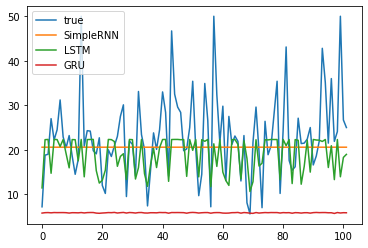

In [ ]:
# Plot predictions vs true values
plt.plot(y_test, label='true')
plt.plot(y_pred_1, label='SimpleRNN')
plt.plot(y_pred_2, label='LSTM')
plt.plot(y_pred_3, label='GRU')
plt.legend()
plt.show()